In [78]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [79]:
def im_read_and_convert(file_path: str , representation: int  = 1):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image file {file_path} not found.")
    if representation == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    elif representation != 1:
        raise ValueError("Representation must be either 1 (grayscale) or 2 (color).")
    return img.astype(np.float64) / 255.0
    
        

In [80]:
def im_display(image_path: str , representation: int = 1):
    img = im_read_and_convert(image_path, representation)
    img = (img * 255).astype(np.uint8) # Convert to uint8 for display
    if representation == 1 or representation == 2:
        plt.imshow(img , cmap='gray_r' if representation == 1 else None)
        plt.axis('off')
        plt.title(f"Image Representation: {'Grayscale' if representation == 1 else 'Color'}")
        plt.show()
    else:
        raise ValueError("Representation must be either 1 (grayscale) or 2 (color).")
    cv2.waitKey(0)
    cv2.destroyAllWindows()

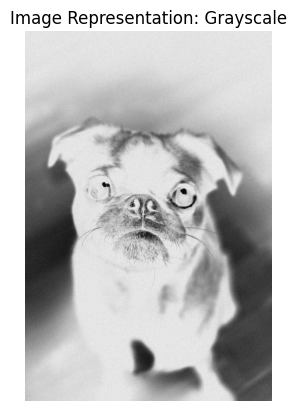

In [81]:
im_display("Assets/toshi-MC2hOZsBsLg-unsplash.jpg")

In [82]:

def rgb_to_yiq(file_path: str) -> np.ndarray:
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Image file {file_path} not found.")

    # Convert to RGB and float64 normalized
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float64)

    r = img[..., 0]
    g = img[..., 1]
    b = img[..., 2]

    yiq = np.zeros_like(img)
    yiq[..., 0] = 0.299 * r + 0.587 * g + 0.114 * b            # Y
    yiq[..., 1] = 0.595716 * r - 0.274453 * g - 0.321263 * b   # I
    yiq[..., 2] = 0.211456 * r - 0.522591 * g + 0.311135 * b   # Q

    return yiq

def yiq_to_rgb(yiq: np.ndarray) -> np.ndarray:
    Y = yiq[..., 0]
    I = yiq[..., 1]
    Q = yiq[..., 2]

    r = Y + 0.9563 * I + 0.6210 * Q
    g = Y - 0.2721 * I - 0.6474 * Q
    b = Y - 1.1070 * I + 1.7046 * Q

    rgb = np.stack([r, g, b], axis=-1)
    rgb = np.clip(rgb, 0, 255)
    return rgb.astype(np.uint8)


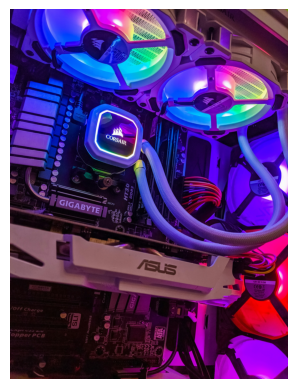

In [83]:
yiq = rgb_to_yiq("Assets/andy-holmes-EOAKUQcsFIU-unsplash.jpg")
rgb_restored = yiq_to_rgb(yiq)
plt.imshow(rgb_restored)
plt.axis('off')
plt.show()


In [102]:
def histogram_equalize(file_path: str):
    input_im = cv2.imread(file_path, cv2.IMREAD_COLOR)
    if input_im is None:
        raise FileNotFoundError(f"Image file {file_path} not found.")
    b , g, r = cv2.split(input_im)
    input_im = r
    plt.imshow(input_im , cmap='gray_r')
    flat = input_im.flatten()
    hist = np.zeros(256, dtype=int)
    for pixel in flat:
        hist[pixel] += 1
    cdf = np.cumsum(hist)
    plt.figure()
    plt.plot(range(256), hist, color='black', label='Histogram')
    plt.title("Histogram of Input Image")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(range(256), cdf, color='blue', label='CDF')
    plt.title("Cumulative Distribution Function (CDF)")
    plt.xlabel("Pixel Value")
    plt.ylabel("Cumulative Frequency")
    plt.legend()
    plt.show()
    cdf_min = cdf[cdf > 0].min()
    total_pixels = input_im.size
    cdf_equalized = np.round((cdf - cdf_min) / (total_pixels - cdf_min) * 255).astype(np.uint8)
    equalized_im = cdf_equalized[flat]
    hist_eq = np.zeros(256, dtype=int)
    for i in equalized_im.flatten():
        hist_eq[i]+= 1
    cdf_eq = np.cumsum(hist_eq)
    plt.figure()
    plt.plot(range(256), cdf_eq, color='red', label='Equalized CDF')
    plt.title("Equalized CDF")
    plt.xlabel("Pixel Value")
    plt.ylabel("Equalized Cumulative Frequency")
    plt.legend()
    plt.show()
    plt.imshow(equalized_im.reshape(input_im.shape), cmap='gray_r')
    plt.axis('off')
    plt.title("Equalized Image")
    plt.figure()
    plt.bar(range(256), hist_eq, color='black')
    plt.title("Histogram After Equalization")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

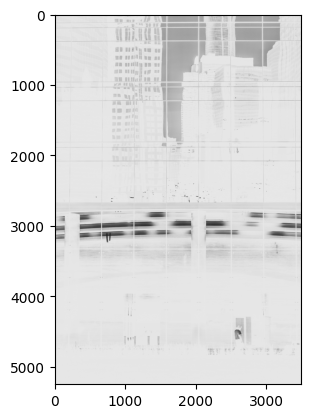

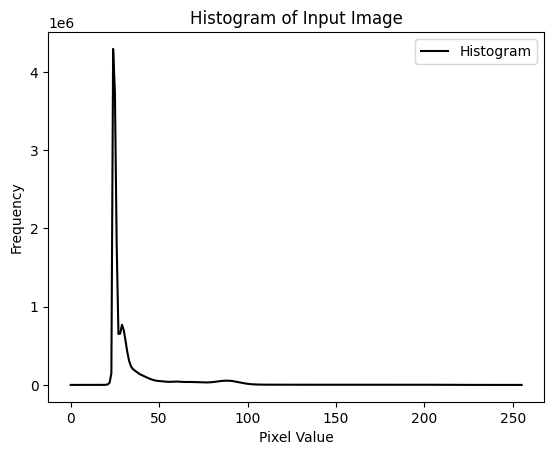

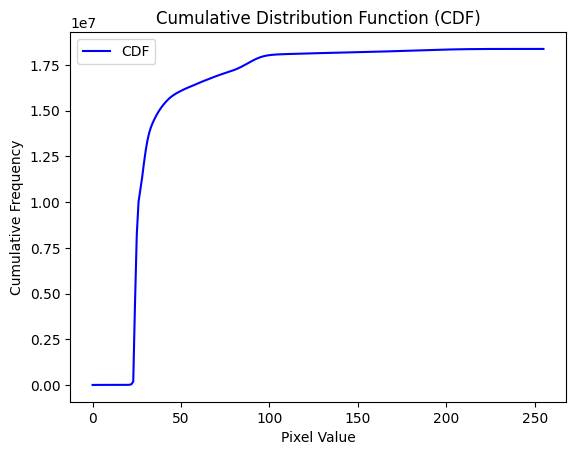

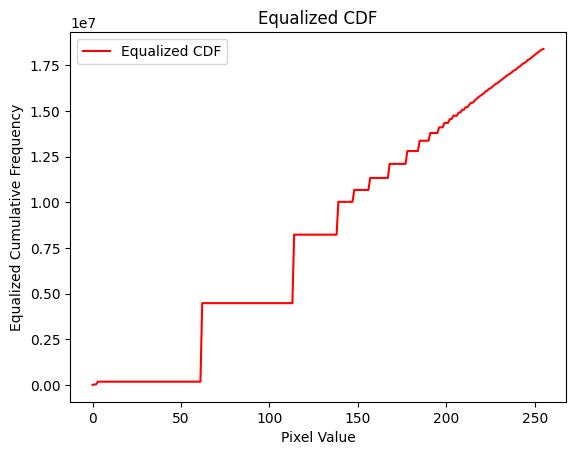

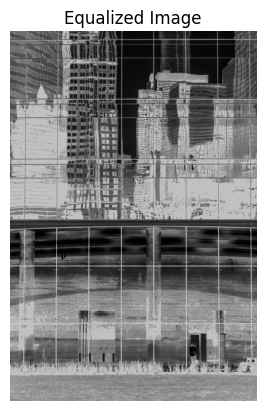

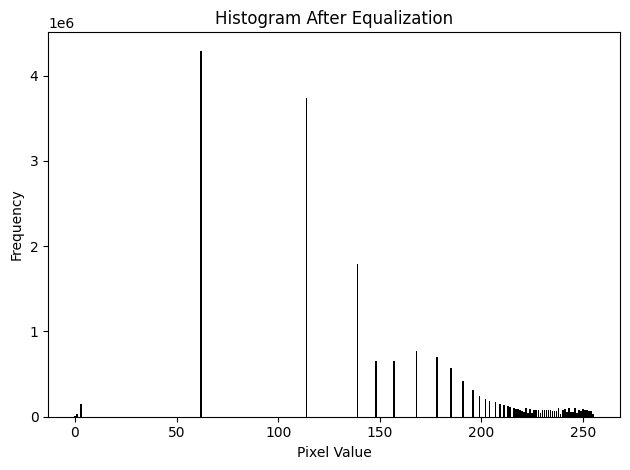

In [103]:
histogram_equalize("Assets/dark_building.jpg")